In [ ]:
import cv2  # import the necessary packages
import numpy as np
from google.colab.patches import cv2_imshow

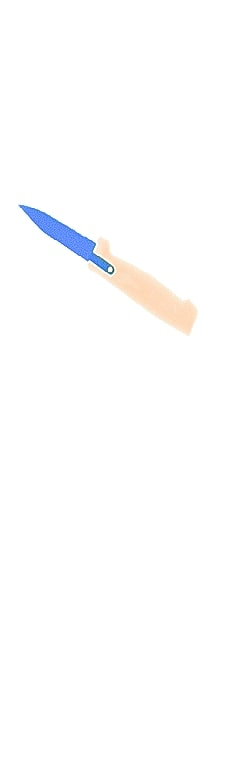

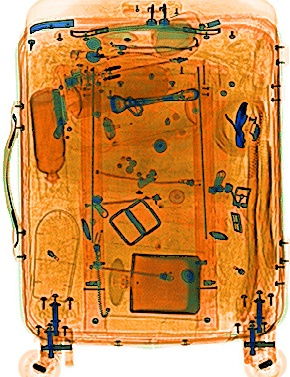

In [ ]:
threat=cv2.imread('knife.jpg') # read image 
bag = cv2.imread('bag.jpg')
cv2_imshow(threat)
cv2_imshow(bag)

Image rotation to 45 degrees


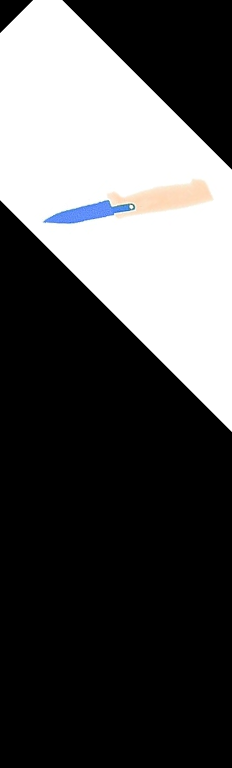

(768, 232)


In [ ]:
(height, width) = threat.shape[:2]

# getRotationMatrix2D creates a matrix needed for transformation.
# We want matrix for rotation to 45 degree without scaling =0.8.
rotationmatrix = cv2.getRotationMatrix2D((width/4,height/4),45,0.8) #rotating the by 45 degress from center as (width/4,height/4)
rotatedimage = cv2.warpAffine(threat, rotationmatrix, (width,height))
cv2.imwrite('r.png',rotatedimage)
cv2_imshow(rotatedimage)
(height, width) = rotatedimage.shape[:2]
print(rotatedimage.shape[:2])

Image cropping


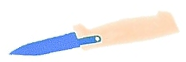

(62, 186)


In [ ]:
startRow = int(height*.22)
startCol = int(width*.15)
endRow = int(height*.30)
endCol = int(width*.95)

#cropping the rotated threat
croppedImage = rotatedimage[startRow:endRow, startCol:endCol]
cv2_imshow(croppedImage)
(hh,ww) = croppedImage.shape[:2]
cv2.imwrite('croppedImage.png', croppedImage)
print(croppedImage.shape[0:2])

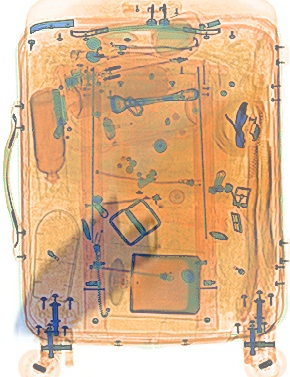

In [ ]:
##Result1

#The closer alpha is to 1.0, the more opaque the image is. 
#Similarly, alpha value closer to 0.0, makes it transparent.

alpha=0.4
threat = cv2.resize(croppedImage , bag.shape[1::-1]) #size of threat image and background(baggage) image should be same
dst = cv2.addWeighted(threat, alpha , bag, 1-alpha, 0) 
cv2.imwrite('final1.png', dst)
imgfinal = cv2.imread('final1.png')
cv2_imshow(imgfinal)

In [ ]:
#Removing the white background from the threat image


from PIL import Image
def convertImg():
  r = Image.open('croppedImage.png')  #reading the cropped threat image
  res_3 = r.convert("RGBA")
  datas = res_3.getdata()
  newData = []
  for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
      newData.append((255,225,255,0))
    else:
      newData.append(item)

  res_3.putdata(newData)
  res_3.save("new.png", "PNG") #threat image without white background
  
convertImg() 


In [ ]:
# split the croppedImage without white backgroung into its respective Blue, Green, Red, and
# Alpha channels; then take the bitwise AND between all channels

x = cv2.imread('new.png')

(hh,ww) = x.shape[:2]
x = np.dstack([x, np.ones((hh, ww), dtype="uint8") * 255])
(B, G, R, A) = cv2.split(x)
B = cv2.bitwise_and(B, B, mask=A)
G = cv2.bitwise_and(G, G, mask=A)
R = cv2.bitwise_and(R, R, mask=A)
x = cv2.merge([B, G, R, A])

(377, 290)
(377, 290)


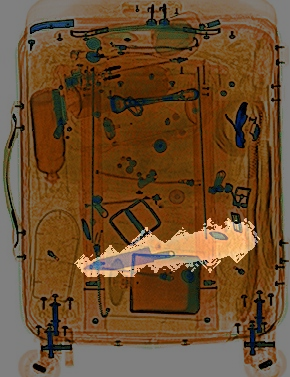

In [ ]:
print(bag.shape[:2])
(height, width) = bag.shape[:2]

# construct an overlay that is the same size as the baggage
# image, (using an extra dimension for the alpha transparency),
# then add the threat image to the overlay.

overlay = np.zeros((height, width,4), dtype="uint8")
overlay[height - hh - 100:height - 100, width - ww - 30:width - 30] = x #specify the postion where we want to add the threat image

# blend the two images together using transparent overlays
output = bag.copy()
output = cv2.addWeighted(overlay, 0.6, output, 0.4, 0, output) #using alpha=0.6

#save the image
cv2.imwrite('final2.png', output)
imgfinal2 = cv2.imread('final2.png')
cv2_imshow(imgfinal2)

